In [1]:
import pandas as pd
import numpy as np
import os
import calendar
import proplot
import matplotlib.pyplot as plt
from scipy.stats import linregress
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio   
pio.kaleido.scope.mathjax = None
import warnings
warnings.filterwarnings('ignore')
os.chdir('/Users/zeqinhuang/Documents/paper/acid_rain')

# bar_polar illustrating the seasonal distribution of air pollution concentration (SO2, NO2, PM10)

## for each station

In [2]:
indices = [i for i in 'abcdefghijklmnopqrstuvwxyz']
indices.append('aa')
indices.append('bb')

aqi_stns = pd.read_csv('ACID_RAIN_DATA/acid_rain_station.csv',header=0,index_col=0)
aqi_stns = aqi_stns[aqi_stns.index!='Xiangzhou'] # acid rain data in Xiangzhou station is not available
stn_index = {stn:index for (stn,index) in zip(aqi_stns.index,indices)}
month_dict = {index: month for index, month in enumerate(calendar.month_abbr) if month}
range_max_dict = {'SO2_daily_max':1.8,'SO2_month_mean':0.8,'NO2_daily_max':2.5,'NO2_month_mean':1.2,'PM10_daily_max':4,'PM10_month_mean':1.6}

for v in ['SO2_daily_max','SO2_month_mean','NO2_daily_max','NO2_month_mean','PM10_daily_max','PM10_month_mean']:
    v_df = pd.read_csv('ACID_RAIN_DATA/' + v + '_interp.csv',index_col=0,header=0)
    v_df.index = pd.to_datetime(v_df.index)
    v_df['month'] = [month_dict[m] for m in v_df.index.month]
    v_df['year'] = v_df.index.year
    for stn in aqi_stns.index:
        fig = px.bar_polar(v_df, r=stn, theta="month",
                        color="year", width=400,height=400, range_r=[0,range_max_dict[v]],
                        color_discrete_sequence= px.colors.sequential.Plasma_r)
        fig.update(layout_coloraxis_showscale=False)
        fig.update_layout(showlegend=False)
        fig.update_layout(
            {
                "plot_bgcolor": "rgba(0, 0, 0, 0)",
                "margin":{"l":50,"r":50,"t":50,"b":50}
            })
        fig.update_layout(
                    font_size=18,
                    title={
                    'text' : stn,
                    'x':0.5,
                    'xanchor': 'center'
                })
        if stn == aqi_stns.index[-1]:
            fig.update_layout(
                annotations=[
                    dict(
                        text=stn_index[stn],
                        showarrow=False,
                        xref="paper",
                        yref="paper",
                        font_size=22,
                        x=0.1,
                        y=1.1)
                ])
        else:
            fig.update_layout(
                annotations=[
                    dict(
                        text=stn_index[stn],
                        showarrow=False,
                        xref="paper",
                        yref="paper",
                        font_size=22,
                        x=-0.1,
                        y=1.1)
                ])
        if v == 'SO2_daily_max' and stn == 'Yuexiu':
            fig.show()
        else:
            pass
        fig.write_image('/Users/zeqinhuang/Documents/paper/acid_rain/Figures/bar_polar_for_' + v + '_concentration/station_'+ stn + '.pdf')

## for each city

In [3]:
cities = np.unique(aqi_stns['City'])
range_max_dict = {'SO2_daily_max':1.6,'SO2_month_mean':0.7,'NO2_daily_max':2.0,'NO2_month_mean':1.0,'PM10_daily_max':3.5,'PM10_month_mean':1.6}

for v in ['SO2_daily_max','SO2_month_mean','NO2_daily_max','NO2_month_mean','PM10_daily_max','PM10_month_mean']:
    v_df = pd.read_csv('ACID_RAIN_DATA/' + v + '_interp.csv',index_col=0,header=0)
    v_df.index = pd.to_datetime(v_df.index)
    v_df['month'] = [month_dict[m] for m in v_df.index.month]
    v_df['year'] = v_df.index.year
    for c in cities:
        stn_sel = aqi_stns[aqi_stns['City']==c].index
        ar_city = v_df.loc[:,v_df.columns.isin(stn_sel)]
        ar_city[c] = ar_city.mean(axis=1)
        ar_city['month'] = [month_dict[m] for m in ar_city.index.month]
        ar_city['year'] = ar_city.index.year

        fig = px.bar_polar(ar_city, r=c, theta="month",
                        color="year", width=400,height=400, range_r=[0,range_max_dict[v]], #range_r=[0,14],
                        color_discrete_sequence= px.colors.sequential.Plasma_r)
        fig.update(layout_coloraxis_showscale=False)
        fig.update_layout(
            {
                "plot_bgcolor": "rgba(0, 0, 0, 0)",
                "margin":{"l":40,"r":40,"t":40,"b":40}
            })
        fig.update_layout(
                font_size=20
            )
        fig.update_layout(
            paper_bgcolor="rgba(0,0,0,0)",
            plot_bgcolor="rgba(0,0,0,0)"
        )
        if v == 'SO2_daily_max' and c == 'Guangzhou':
            fig.show()
        else:
            pass
        fig.write_image('/Users/zeqinhuang/Documents/paper/acid_rain/Figures/bar_polar_for_' + v + '_concentration/city_'+ c + '.svg')

## for GBA

In [4]:
cities = np.unique(aqi_stns['City'])
range_max_dict = {'SO2_daily_max':1.6,'SO2_month_mean':0.7,'NO2_daily_max':2.0,'NO2_month_mean':1.0,'PM10_daily_max':3.5,'PM10_month_mean':1.6}

for v in ['SO2_daily_max','SO2_month_mean','NO2_daily_max','NO2_month_mean','PM10_daily_max','PM10_month_mean']:
    v_df = pd.read_csv('ACID_RAIN_DATA/' + v + '_interp.csv',index_col=0,header=0)
    v_df.index = pd.to_datetime(v_df.index)
    ar_cities = pd.DataFrame()
    for c in cities:
        stn_sel = aqi_stns[aqi_stns['City']==c].index
        ar_city = v_df.loc[:,v_df.columns.isin(stn_sel)]
        ar_city[c] = ar_city.mean(axis=1)
        ar_cities = pd.concat([ar_cities, ar_city[c]], axis=1)
    ar_cities['GBA'] = ar_cities.mean(axis=1)
    ar_cities['month'] = [month_dict[m] for m in v_df.index.month]
    ar_cities['year'] = v_df.index.year
    fig = px.bar_polar(ar_cities, r="GBA", theta="month",
                                color="year", width=400,height=500, range_r=[0,range_max_dict[v]], #range_r=[0,12],
                                color_discrete_sequence= px.colors.sequential.Plasma_r)
    fig.update(layout_coloraxis_showscale=True)
    fig.update_layout(
        {
            "plot_bgcolor": "rgba(0, 0, 0, 0)",
            "margin":{"l":0,"r":0,"t":80,"b":100}
        })
    fig.update_layout(
            font_size=18,
            title={
            'text' : 'Greater Bay Area',
            'x':0.5,
            'y':0.97,
            'xanchor': 'center',
            'yanchor': 'middle'
        })
    fig.update_coloraxes(colorbar={'orientation':'h', 'thickness':20, 'y': -0.45, 'title_side':'top'})
    if v == 'SO2_daily_max':
        fig.show()
    else:
        pass

    fig.write_image('/Users/zeqinhuang/Documents/paper/acid_rain/Figures/bar_polar_for_' + v + '_concentration/GBA_' + v + '_concentration.svg')

# annual changes in air pollutants

In [27]:
cities = np.unique(aqi_stns['City'])
cities_list = cities.tolist()
cities_list.append('GBA')

acid_rain_city_SO2_max_cities = pd.DataFrame()
acid_rain_city_SO2_mean_cities = pd.DataFrame()
acid_rain_city_NO2_max_cities = pd.DataFrame()
acid_rain_city_NO2_mean_cities = pd.DataFrame()
acid_rain_city_PM10_max_cities = pd.DataFrame()
acid_rain_city_PM10_mean_cities = pd.DataFrame()

for c in cities_list:

    if c != 'GBA':
        stn_sel = aqi_stns[aqi_stns['City']==c].index
    else:
        stn_sel = aqi_stns.index
    
    acid_rain_city_SO2_max = pd.read_csv('ACID_RAIN_DATA/' + 'SO2_daily_max' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_SO2_max.index = pd.to_datetime(acid_rain_city_SO2_max.index)
    acid_rain_city_SO2_max_sel = acid_rain_city_SO2_max.loc[:,acid_rain_city_SO2_max.columns.isin(stn_sel)]
    acid_rain_city_SO2_max_cities[c]   = acid_rain_city_SO2_max_sel.mean(axis=1,skipna=True)

    acid_rain_city_SO2_mean = pd.read_csv('ACID_RAIN_DATA/' + 'SO2_month_mean' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_SO2_mean.index = pd.to_datetime(acid_rain_city_SO2_mean.index)
    acid_rain_city_SO2_mean_sel = acid_rain_city_SO2_mean.loc[:,acid_rain_city_SO2_mean.columns.isin(stn_sel)]
    acid_rain_city_SO2_mean_cities[c]   = acid_rain_city_SO2_mean_sel.mean(axis=1,skipna=True)

    acid_rain_city_NO2_max = pd.read_csv('ACID_RAIN_DATA/' + 'NO2_daily_max' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_NO2_max.index = pd.to_datetime(acid_rain_city_NO2_max.index)
    acid_rain_city_NO2_max_sel = acid_rain_city_NO2_max.loc[:,acid_rain_city_NO2_max.columns.isin(stn_sel)]
    acid_rain_city_NO2_max_cities[c]   = acid_rain_city_NO2_max_sel.mean(axis=1,skipna=True)

    acid_rain_city_NO2_mean = pd.read_csv('ACID_RAIN_DATA/' + 'NO2_month_mean' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_NO2_mean.index = pd.to_datetime(acid_rain_city_NO2_mean.index)
    acid_rain_city_NO2_mean_sel = acid_rain_city_NO2_mean.loc[:,acid_rain_city_NO2_mean.columns.isin(stn_sel)]
    acid_rain_city_NO2_mean_cities[c]   = acid_rain_city_NO2_mean_sel.mean(axis=1,skipna=True)

    acid_rain_city_PM10_max = pd.read_csv('ACID_RAIN_DATA/' + 'PM10_daily_max' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_PM10_max.index = pd.to_datetime(acid_rain_city_PM10_max.index)
    acid_rain_city_PM10_max_sel = acid_rain_city_PM10_max.loc[:,acid_rain_city_PM10_max.columns.isin(stn_sel)]
    acid_rain_city_PM10_max_cities[c]   = acid_rain_city_PM10_max_sel.mean(axis=1,skipna=True)

    acid_rain_city_PM10_mean = pd.read_csv('ACID_RAIN_DATA/' + 'PM10_month_mean' + '_interp.csv',index_col=0,header=0)
    acid_rain_city_PM10_mean.index = pd.to_datetime(acid_rain_city_PM10_mean.index)
    acid_rain_city_PM10_mean_sel = acid_rain_city_PM10_mean.loc[:,acid_rain_city_PM10_mean.columns.isin(stn_sel)]
    acid_rain_city_PM10_mean_cities[c]   = acid_rain_city_PM10_mean_sel.mean(axis=1,skipna=True)

acid_rain_city_SO2_max_cities = acid_rain_city_SO2_max_cities.groupby(acid_rain_city_SO2_max_cities.index.year).mean() * 1000 # convert from mg/m3 to ug/m3
acid_rain_city_SO2_mean_cities = acid_rain_city_SO2_mean_cities.groupby(acid_rain_city_SO2_mean_cities.index.year).mean() * 1000
acid_rain_city_NO2_max_cities = acid_rain_city_NO2_max_cities.groupby(acid_rain_city_NO2_max_cities.index.year).mean() * 1000
acid_rain_city_NO2_mean_cities = acid_rain_city_NO2_mean_cities.groupby(acid_rain_city_NO2_mean_cities.index.year).mean() * 1000
acid_rain_city_PM10_max_cities = acid_rain_city_PM10_max_cities.groupby(acid_rain_city_PM10_max_cities.index.year).mean() * 1000
acid_rain_city_PM10_mean_cities = acid_rain_city_PM10_mean_cities.groupby(acid_rain_city_PM10_mean_cities.index.year).mean() * 1000

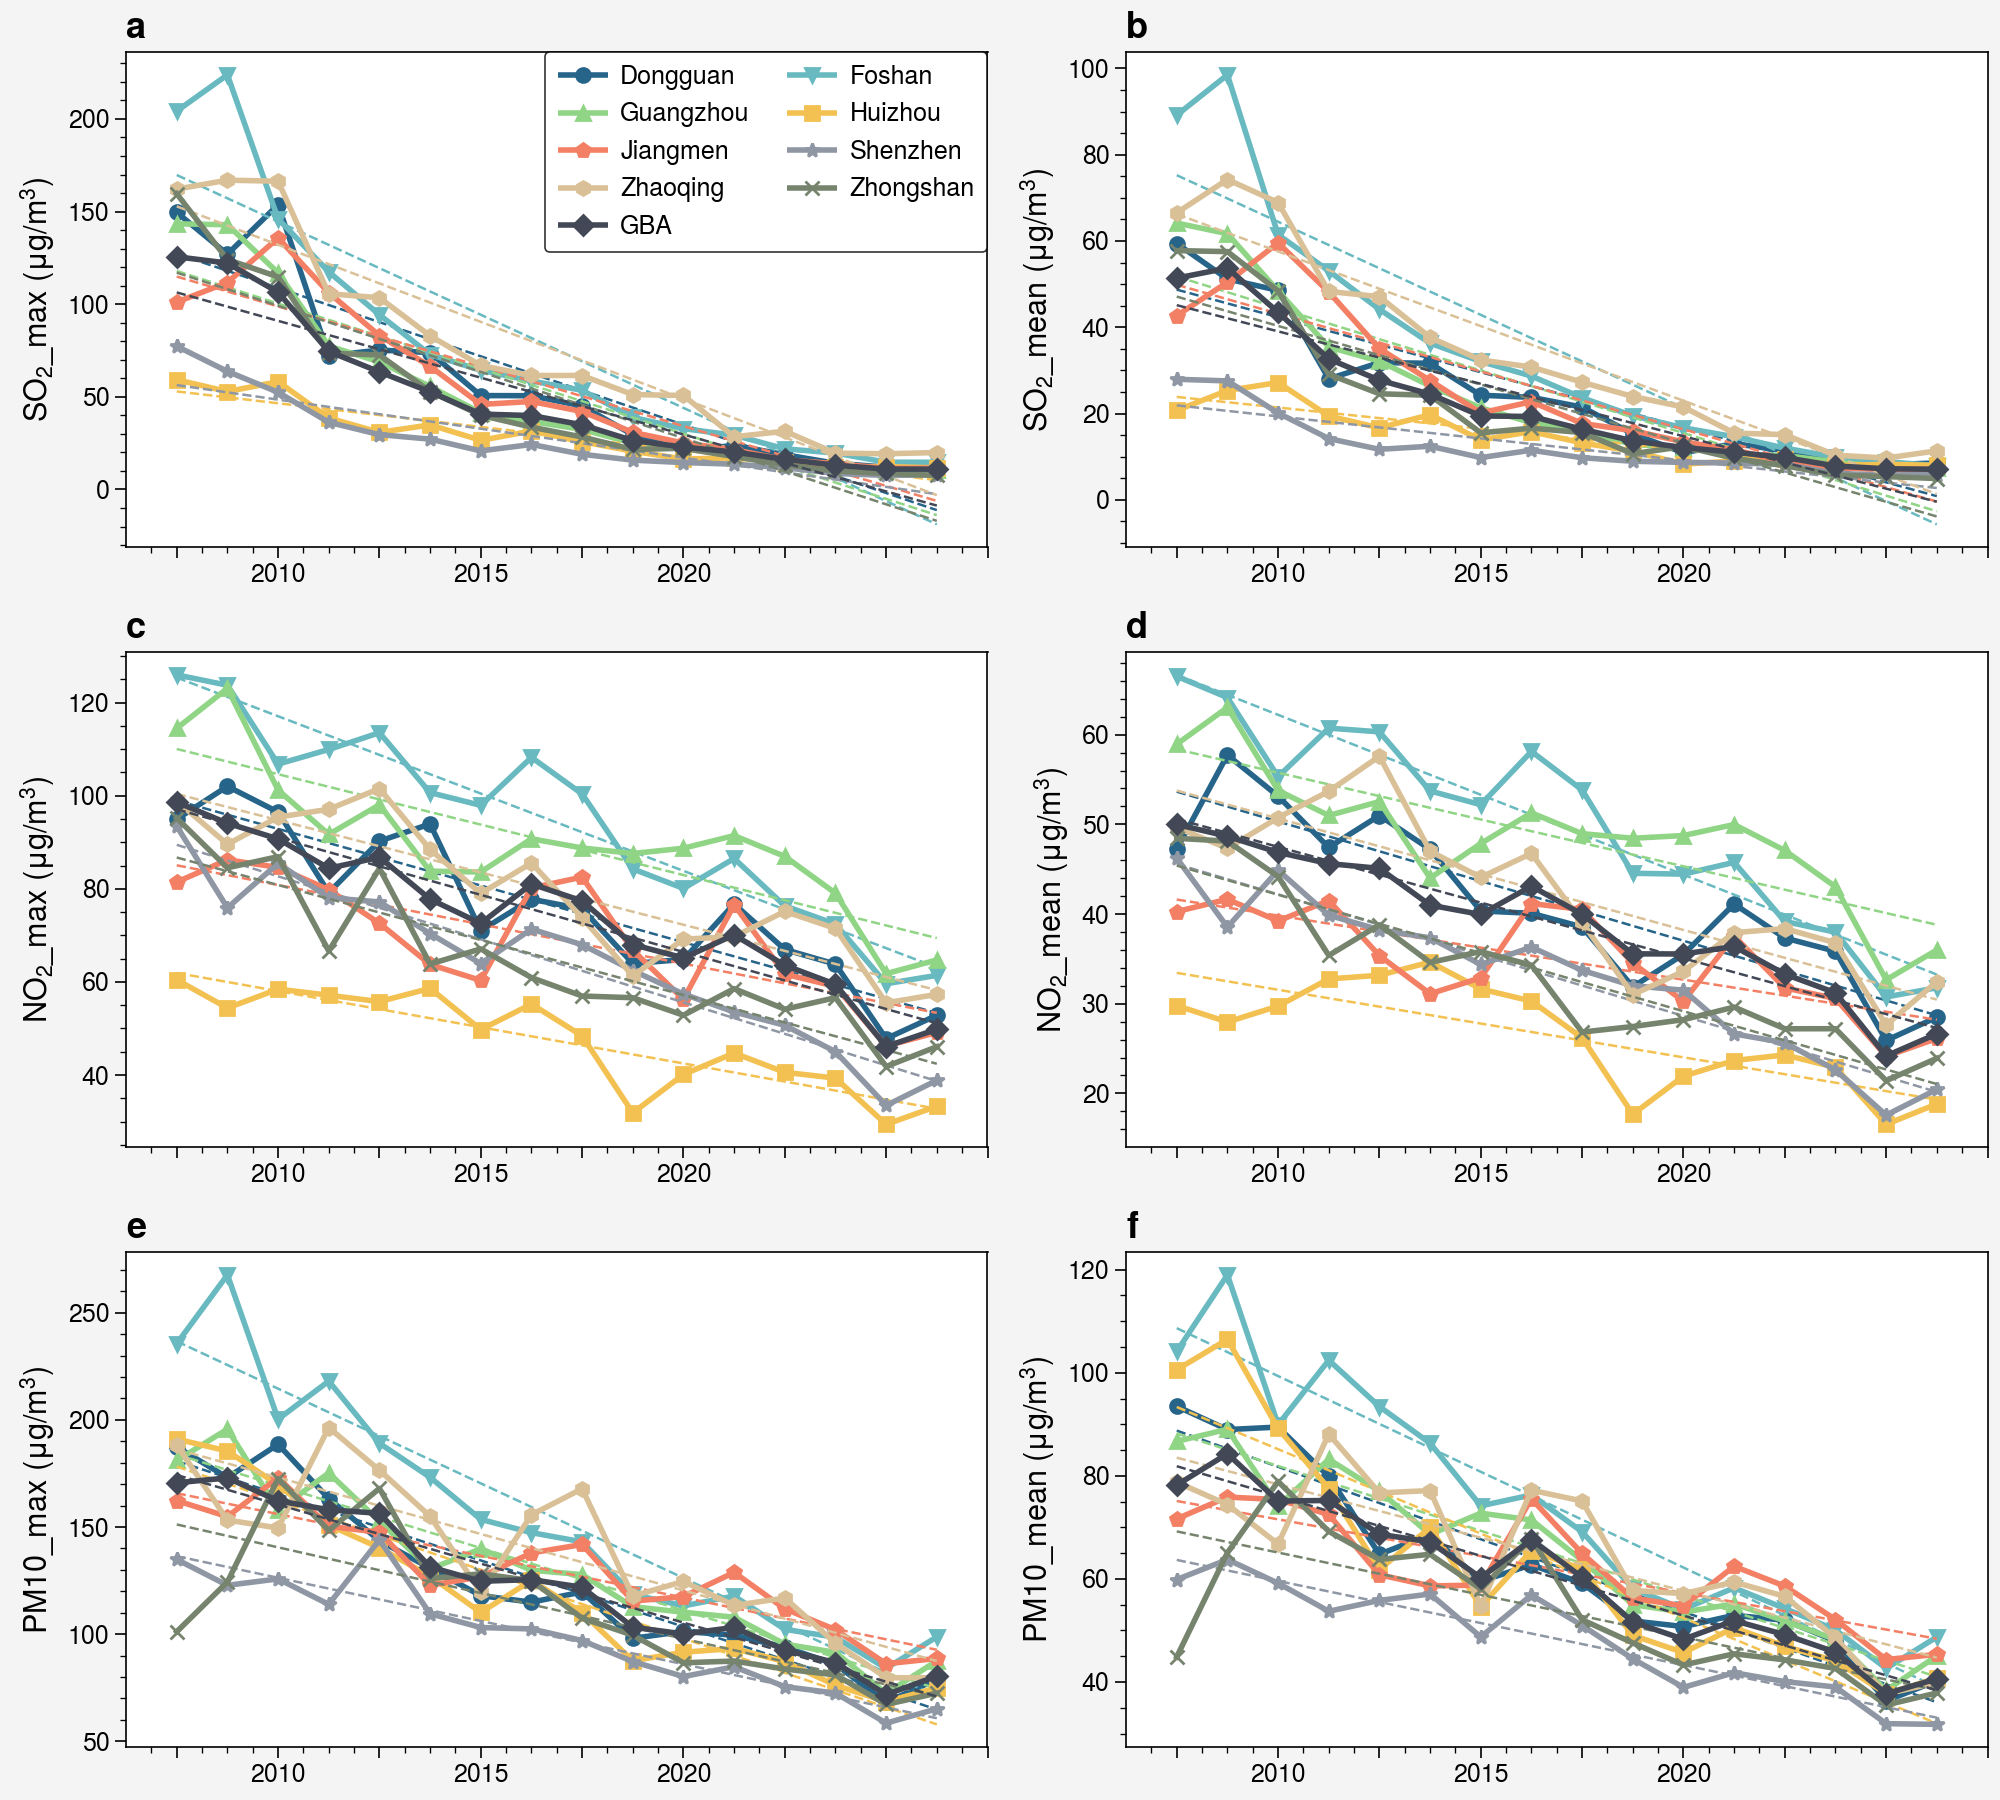

In [33]:
city_colors = ['#EF9A9A','#CE93D8','#B3E5FC','#80CBC4','#C5E1A5','#FFEB3B','#BCAAA4','#B0BEC5','black']
city_colors = ['#266489','#68B9C0','#90D585','#F3C151','#F37F64','#8F97A4','#DAC096','#76846E','#424856']
city_markers = ['o','v','^','s','p','*','h','x','D']
p_all = []
SO2_max_slp_all  = {}
SO2_max_pvalue_all  = {}
SO2_max_stderr_all = {}
SO2_mean_slp_all  = {}
SO2_mean_pvalue_all  = {}
SO2_mean_stderr_all = {}
NO2_max_slp_all  = {}
NO2_max_pvalue_all  = {}
NO2_max_stderr_all = {}
NO2_mean_slp_all  = {}
NO2_mean_pvalue_all  = {}
NO2_mean_stderr_all = {}
PM10_max_slp_all  = {}
PM10_max_pvalue_all  = {}
PM10_max_stderr_all = {}
PM10_mean_slp_all  = {}
PM10_mean_pvalue_all  = {}
PM10_mean_stderr_all = {}

fig, axs = proplot.subplots(ncols=2, nrows=3, figsize=(10,9),share=0)
for i in range(len(cities_list)):
    c = cities_list[i]
    p = axs[0].plot(acid_rain_city_SO2_max_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5, linewidth=2, alpha=1)
    axs[1].plot(acid_rain_city_SO2_mean_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5,linewidth=2, alpha=1)
    axs[2].plot(acid_rain_city_NO2_max_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5,linewidth=2, alpha=1)
    axs[3].plot(acid_rain_city_NO2_mean_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5,linewidth=2, alpha=1)
    axs[4].plot(acid_rain_city_PM10_max_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5,linewidth=2, alpha=1)
    axs[5].plot(acid_rain_city_PM10_mean_cities[c], color=city_colors[i], marker=city_markers[i], markersize=5,linewidth=2, alpha=1)
    p_all.append(p)

    x = range(2006,2022)
    y1 = acid_rain_city_SO2_max_cities[c]
    y2 = acid_rain_city_SO2_mean_cities[c]
    y3 = acid_rain_city_NO2_max_cities[c]
    y4 = acid_rain_city_NO2_mean_cities[c]
    y5 = acid_rain_city_PM10_max_cities[c]
    y6 = acid_rain_city_PM10_mean_cities[c]

    SO2_max_slp, SO2_max_intercept, _, SO2_max_pvalue, SO2_max_stderr,  = linregress(x,y1)
    SO2_mean_slp, SO2_mean_intercept, _, SO2_mean_pvalue, SO2_mean_stderr,  = linregress(x,y2)
    NO2_max_slp, NO2_max_intercept, _, NO2_max_pvalue, NO2_max_stderr,  = linregress(x,y3)
    NO2_mean_slp, NO2_mean_intercept, _, NO2_mean_pvalue, NO2_mean_stderr,  = linregress(x,y4)
    PM10_max_slp, PM10_max_intercept, _, PM10_max_pvalue, PM10_max_stderr,  = linregress(x,y5)
    PM10_mean_slp, PM10_mean_intercept, _, PM10_mean_pvalue, PM10_mean_stderr,  = linregress(x,y6)

    SO2_max_slp_all[c]  = SO2_max_slp
    SO2_max_pvalue_all[c]  = SO2_max_pvalue
    SO2_max_stderr_all[c] = SO2_max_stderr
    SO2_mean_slp_all[c]  = SO2_mean_slp
    SO2_mean_pvalue_all[c]  = SO2_mean_pvalue
    SO2_mean_stderr_all[c] = SO2_mean_stderr
    NO2_max_slp_all[c]  = NO2_max_slp
    NO2_max_pvalue_all[c]  = NO2_max_pvalue
    NO2_max_stderr_all[c] = NO2_max_stderr
    NO2_mean_slp_all[c]  = NO2_mean_slp
    NO2_mean_pvalue_all[c]  = NO2_mean_pvalue
    NO2_mean_stderr_all[c] = NO2_mean_stderr
    PM10_max_slp_all[c]  = PM10_max_slp
    PM10_max_pvalue_all[c]  = PM10_max_pvalue
    PM10_max_stderr_all[c] = PM10_max_pvalue
    PM10_mean_slp_all[c]  = PM10_mean_slp
    PM10_mean_pvalue_all[c]  = PM10_mean_pvalue
    PM10_mean_stderr_all[c] = PM10_mean_stderr

    axs[0].plot(np.arange(2006,2022), np.arange(2006,2022) * SO2_max_slp + SO2_max_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)
    axs[1].plot(np.arange(2006,2022), np.arange(2006,2022) * SO2_mean_slp + SO2_mean_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)
    axs[2].plot(np.arange(2006,2022), np.arange(2006,2022) * NO2_max_slp + NO2_max_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)
    axs[3].plot(np.arange(2006,2022), np.arange(2006,2022) * NO2_mean_slp + NO2_mean_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)
    axs[4].plot(np.arange(2006,2022), np.arange(2006,2022) * PM10_max_slp + PM10_max_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)
    axs[5].plot(np.arange(2006,2022), np.arange(2006,2022) * PM10_mean_slp + PM10_mean_intercept, color=city_colors[i], linewidth=0.9, linestyle = '--', alpha=1)

axs[0].set_ylabel('$SO_2$_max (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})
axs[1].set_ylabel('$SO_2$_mean (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})
axs[2].set_ylabel('$NO_2$_max (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})
axs[3].set_ylabel('$NO_2$_mean (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})
axs[4].set_ylabel('PM10_max (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})
axs[5].set_ylabel('PM10_mean (μg/$m^3$)',fontdict={'fontsize':10,'fontweight': 'medium'})

axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs[4].grid(False)
axs[5].grid(False)

axs[0].set_xlim(2005,2022)
axs[1].set_xlim(2005,2022)
axs[2].set_xlim(2005,2022)
axs[3].set_xlim(2005,2022)
axs[4].set_xlim(2005,2022)
axs[5].set_xlim(2005,2022)

axs[0].set_xticklabels([2005,None,2010,None,2015,None,2020])
axs[1].set_xticklabels([2005,None,2010,None,2015,None,2020])
axs[2].set_xticklabels([2005,None,2010,None,2015,None,2020])
axs[3].set_xticklabels([2005,None,2010,None,2015,None,2020])
axs[4].set_xticklabels([2005,None,2010,None,2015,None,2020])
axs[5].set_xticklabels([2005,None,2010,None,2015,None,2020])

axs.format(abc='a',abcloc='l',abc_kw={'fontsize':13,'fontweight':'bold'})
axs.format(xlabel_kw={'fontsize':11,'fontweight':'medium'})
axs.format(ylabel_kw={'fontsize':11,'fontweight':'medium'})

axs[0].legend(
    p_all, cities_list,fancybox = True,frameon=True, loc = 'upper right', #labelspacing = 1, #title='Legend', #bbox_to_anchor=[0.1,0.6], 
    ncol=2,fontsize=11)

fig_dir = '/Users/zeqinhuang/Documents/paper/acid_rain/Figures/'
fig.savefig(fig_dir+'Fig5_air_quality_characteristics_stats.pdf')
fig.savefig(fig_dir+'Fig5_air_quality_characteristics_stats.png',dpi=300)

In [26]:
pH_trend_stat = pd.DataFrame.from_dict(
    [SO2_max_slp_all, SO2_max_pvalue_all, SO2_max_stderr_all, SO2_mean_slp_all, SO2_mean_pvalue_all, 
    SO2_mean_stderr_all, NO2_max_slp_all, NO2_max_pvalue_all, NO2_max_stderr_all, NO2_mean_slp_all, NO2_mean_pvalue_all,
    NO2_mean_stderr_all, PM10_max_slp_all, PM10_max_pvalue_all, PM10_max_stderr_all, PM10_mean_slp_all, PM10_mean_pvalue_all, PM10_mean_stderr_all, ]).transpose()
pH_trend_stat.columns = [
    'SO2_max_slp_all', 'SO2_max_pvalue_all', 'SO2_max_stderr_all', 'SO2_mean_slp_all', 'SO2_mean_pvalue_all', 
    'SO2_mean_stderr_all', 'NO2_max_slp_all', 'NO2_max_pvalue_all', 'NO2_max_stderr_all', 'NO2_mean_slp_all', 
    'NO2_mean_pvalue_all', 'NO2_mean_stderr_all', 'PM10_max_slp_all', 'PM10_max_pvalue_all', 'PM10_max_stderr_all', 
    'PM10_mean_slp_all', 'PM10_mean_pvalue_all', 'PM10_mean_stderr_all']
pH_trend_stat.to_csv('ACID_RAIN_DATA/air_quality_stats_for_each_city.csv')